In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.optimizers import Adamd
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras import backend as K
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras import backend as K
import tensorflow as tf
import pandas as pd 
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob
import os
import numpy as np
import pandas as pd
import random,shutil
from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,UpSampling2D
import cv2
from mpl_toolkits.mplot3d import Axes3D
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


# Common
import os
import keras 
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import clear_output as cls

# Data Loading
from keras.preprocessing.image import ImageDataGenerator as IDG

# Data Loading
import plotly.express as px
import matplotlib.pyplot as plt

<h1 style='color:brown' align='center'><font color="red" align='center' size=+3 face="Comic Sans MS">Quantification des Maladies des Feuilles de Tomate par Vision par Ordinateur : Vers une Agriculture Précise et Durable </font></h1>

<h1 style='color:brown' ><font color="red"  size=+3 face="Comic Sans MS"> I - Introduction </font></h1>
<h1 style='color:brown' ><font color="blue"  size=+1 face="Comic Sans MS"> Dans le domaine agricole, la détection précoce des maladies des plantes est cruciale pour garantir des rendements optimaux. Notre projet se concentre sur la segmentation des feuilles de tomate atteintes de maladies, offrant une solution innovante pour identifier les parties affectées de manière précise. En combinant la vision par ordinateur et la technologie de segmentation, nous contribuons à l'optimisation de l'utilisation des pesticides. En détectant visuellement les maladies invisibles à l'œil nu, notre approche permet une intervention ciblée, réduisant ainsi le recours excessif aux pesticides. Cette avancée prometteuse ouvre la voie à une gestion agricole plus durable, économique et respectueuse de l'environnement.</font></h1>

<h1 style='color:brown' ><font color="red"  size=+3 face="Comic Sans MS"> II - Dataset</font></h1>


> <h3 style='color:Blue' ><font color="green" align='center' size=+2 face="Comic Sans MS">1) - Contexte :</font></h3>
<h3 style='color:Blue' ><font color="blue" align='center' size=+1 face="Arial">
 <lu>
<li>Ce jeu de données contient 588 images de feuilles malades et 588 masques des images correspondantes.</li>
<li>La collecte de données est basée sur les images de PlantDoc.</li>
<li>Vous pouvez utiliser ce jeu de données pour la segmentation des maladies des feuilles de plantes à partir d'images.</li> </lu>

 > <h3 style='color:Blue' ><font color="green" align='center' size=+2 face="Comic Sans MS"> 2) - Contenu :</font></h3>
<p>Les images représentent plusieurs types de feuilles de plantes telles que la Tavelure de la Pomme, la Rouille de la Pomme, la Tache des Feuilles de Poivron, la Pourriture des Feuilles de Maïs, la Pourriture Précoce des Feuilles de Pomme de Terre, etc.</p>
<p>Les photos ont différentes résolutions et proportions différentes !</p>
<p>Les masques contiennent le fond et la maladie.</p></font></h3>

<h1 style='color:brown' ><font color="red"  size=+3 face="Comic Sans MS"> III - Téléchargement des données.</font></h1>


In [4]:
# Function to load images and masks from folders
def load_data(images_folder, masks_folder):
    image_files = sorted(os.listdir(images_folder))
    mask_files = sorted(os.listdir(masks_folder))

    images = [cv2.imread(os.path.join(images_folder, img)) for img in image_files]
    masks = [cv2.imread(os.path.join(masks_folder, msk), cv2.IMREAD_GRAYSCALE) for msk in mask_files]
    return images, masks

images_folder_path = '/kaggle/input/leaf-disease-segmentation-dataset/data/data/images'
masks_folder_path = '/kaggle/input/leaf-disease-segmentation-dataset/data/data/masks'
images, masks = load_data(images_folder_path, masks_folder_path)

<h1 style='color:brown' ><font color="red"  size=+3 face="Comic Sans MS"> IV - EDA.</font></h1>


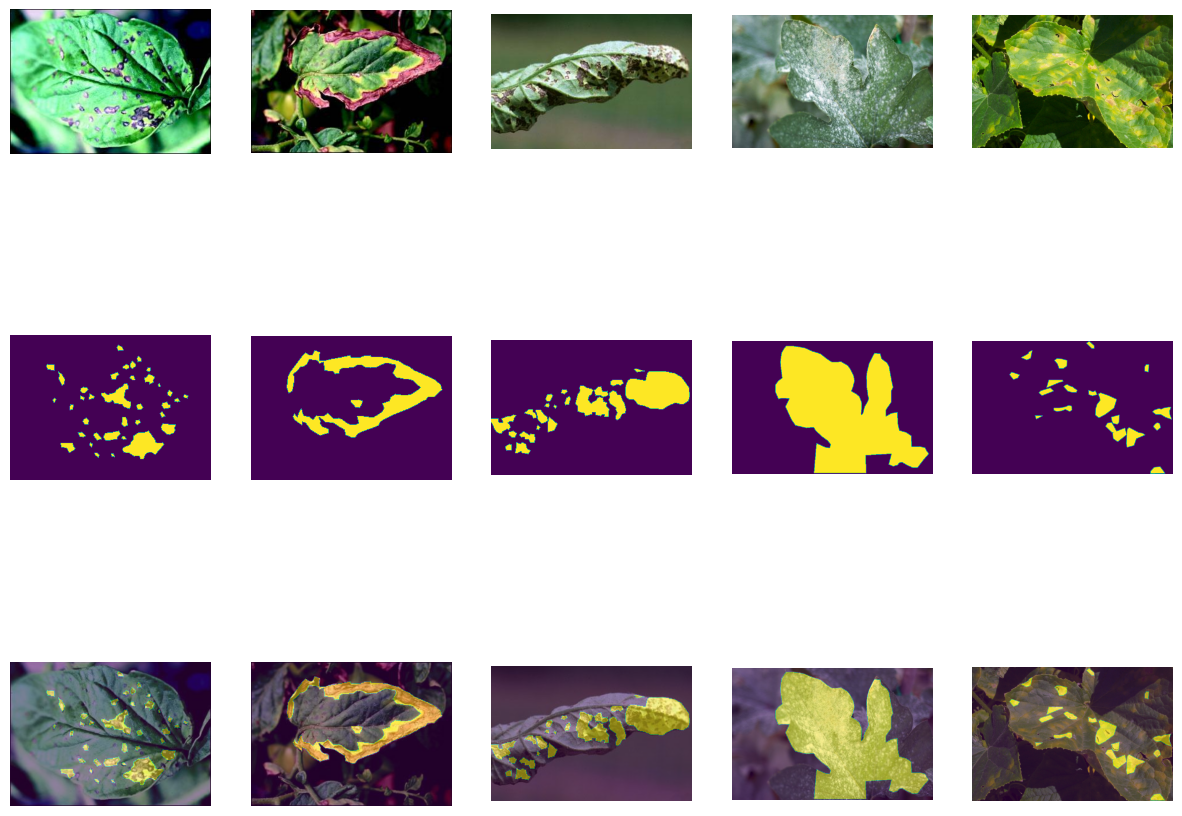

In [7]:
# Function to visualize images, masks, and images with masks
def visualize_images_and_masks(images, masks):
    num_images = len(images)
    fig, axes = plt.subplots(3, num_images, figsize=(15, 12))

    for i in range(num_images):
        # Display original image above
        axes[0, i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axes[0, i].axis('off')

        # Display mask in the middle row
        axes[1, i].imshow(masks[i], cmap='viridis')
        axes[1, i].axis('off')

        # Display image with mask below
        axes[2, i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axes[2, i].imshow(masks[i], alpha=0.5, cmap='viridis')  # Overlay mask on the image
        axes[2, i].axis('off')

    plt.show()

visualize_images_and_masks(images[:5], masks[:5])

In [ ]:
from PIL import Image
import os

def get_minimum_image_size(folder_path):
    min_width = float('inf')
    min_height = float('inf')

    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)
            width, height = image.size
            min_width = min(min_width, width)
            min_height = min(min_height, height)

    return min_width, min_height

images_folder_path = '/content/drive/MyDrive/YOLOv8_Data/tomato_disease_segmentation/data/images'
masks_folder_path = '/content/drive/MyDrive/YOLOv8_Data/tomato_disease_segmentation/data/masks'

min_width_images, min_height_images = get_minimum_image_size(images_folder_path)
min_width_masks, min_height_masks = get_minimum_image_size(masks_folder_path)

print(f"Minimum size of images: {min_width_images} x {min_height_images}")
print(f"Minimum size of masks: {min_width_masks} x {min_height_masks}")


Minimum size of images: 94 x 150

Minimum size of masks: 94 x 150


<h1 style='color:brown' ><font color="red"  size=+3 face="Comic Sans MS"> V - Préparation des données </font></h1>


> <h1 style='color:brown' ><font color="green"  size=+2 face="Comic Sans MS"> 1) - L'augmentation de données</font></h1>

In [ ]:
def apply_data_augmentation(images, masks, augmentations=10):
    augmented_images = []
    augmented_masks = []

    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    for i in range(len(images)):
        img = images[i]
        mask = masks[i]

        img = img.reshape((1,) + img.shape)  # Add an extra dimension for batch size
        mask = mask.reshape((1,) + mask.shape)

        # Generate augmented images and masks
        for _ in range(augmentations):
            augmented_img, augmented_mask = next(datagen.flow(img, mask))
            augmented_img = augmented_img.squeeze()
            augmented_mask = augmented_mask.squeeze()

            augmented_images.append(augmented_img)
            augmented_masks.append(augmented_mask)

    return augmented_images, augmented_masks

# Apply data augmentation
augmented_images, masks = apply_data_augmentation(images, masks)

> <h1 style='color:brown' ><font color="green"  size=+2 face="Comic Sans MS"> 2) - 
La normalisation des données</font></h1>

In [ ]:
# Function to normalize the images
def normalize_images(images):
    normalized_images = [(img - np.min(img)) / (np.max(img) - np.min(img)) for img in images]
    return normalized_images
# Normalize images
images = normalize_images(augmented_images)

> <h1 style='color:brown' ><font color="green"  size=+2 face="Comic Sans MS"> 3) - Division des données en ensembles d'entraînement, de validation et de test </font></h1>

In [17]:
# Assuming images and masks are already loaded
X_train, X_temp, y_train, y_temp = train_test_split(images, masks, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the shapes of the datasetsas
print("Train shapes:", len(X_train), len(y_train))
print("Validation shapes:", len(X_val), len(y_val))
print("Test shapes:", len(X_test), len(y_test))


Train shapes: 2058 2058
Validation shapes: 441 441
Test shapes: 441 441


> <h1 style='color:brown' ><font color="green"  size=+2 face="Comic Sans MS"> 4) - Redimensionner les images </font></h1>

In [18]:
desired_height = 128 #min_height_images
desired_width  =128 # min_width_images
num_channels = 3

input_shape = (desired_height, desired_width, num_channels)  # Set your desired input shape

def preprocess_data(images, masks):
    processed_images = [cv2.resize(img, (desired_width, desired_height)) for img in images]
    processed_masks = [cv2.resize(mask, (desired_width, desired_height)) for mask in masks]
    processed_masks = [np.expand_dims(mask, axis=-1) for mask in processed_masks]
    processed_masks = np.array(processed_masks) / 255.0  # Normalize pixel values to [0, 1]

    return np.array(processed_images), processed_masks

X_train, y_train = preprocess_data(X_train, y_train)
X_val, y_val = preprocess_data(X_val, y_val)
X_test, y_test = preprocess_data(X_test, y_test)


<h1 style='color:brown' ><font color="red"  size=+3 face="Comic Sans MS"> VI - Segmentation sémantique : Construire le modèle SegNet </font></h1>

> <h1 style='color:brown' ><font color="green"  size=+2 face="Comic Sans MS"> 1) - Fonctions de mesures de segmentation </font></h1>

<h3 style='color:Blue' ><font color="blue" align='center' size=+1 face="Arial">Fonction mean_iou(y_true, y_pred) :</font></h3>
<p><strong>Objectif :</strong> Calculer la métrique Intersection over Union (IoU) pour l'évaluation de la segmentation.</p>
<p><strong>Étapes :</strong></p>
<ol>
  <li>Calculer l'intersection en additionnant le produit élémentaire des masques binaires vrais et prédits.</li>
  <li>Calculer l'union en additionnant le masque vrai et le masque prédit arrondi, en soustrayant l'intersection.</li>
  <li>Calculer l'IoU en divisant l'intersection par l'union.</li>
  <li>Retourner la valeur de l'IoU.</li>
</ol>

<h3 style='color:Blue' ><font color="blue" align='center' size=+1 face="Arial">Fonction dice_coefficient(y_true, y_pred) :</font></h3>
<p><strong>Objectif :</strong> Calculer le coefficient Dice pour l'évaluation de la segmentation.</p>
<p><strong>Étapes :</strong></p>
<ol>
  <li>Calculer l'intersection en additionnant le produit élémentaire des masques binaires vrais et prédits.</li>
  <li>Calculer le coefficient Dice en utilisant la formule : (2 * intersection + epsilon) / (somme du masque vrai + somme du masque prédit + epsilon).</li>
  <li>Retourner la valeur du coefficient Dice.</li>
</ol>

In [19]:
# Function to compute Intersection over Union (IoU)
def mean_iou(y_true, y_pred):
    intersection = K.sum(K.abs(y_true * K.round(y_pred)))
    union = K.sum(y_true) + K.sum(K.round(y_pred)) - intersection
    iou = intersection / union
    return iou

# Function to compute Dice coefficient
def dice_coefficient(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    dice = (2. * intersection + K.epsilon()) / (K.sum(y_true) + K.sum(y_pred) + K.epsilon())
    return dice

> <h1 style='color:brown' ><font color="green"  size=+2 face="Comic Sans MS"> 2) - Définir le modèle SegNet en utilisant TensorFlow et Keras </font></h1>

<h3 style='color:Green' ><font color="green" align='center' size=+1 face="Arial">Encodeur :</font></h3>
<h4 style='color:SaddleBrown' ><font color="saddlebrown" align='left' size=+0.7 face="Arial">Première couche de convolution (Conv2D) :</font></h4>
<ul style='color:blue'>
  <li>64 filtres, noyau de taille (3, 3).</li>
  <li>Activation ReLU, padding 'same'.</li>
  <li>Couche de normalisation par lots (Batch Normalization).</li>
  <li>Couche de dropout (Dropout) avec un taux de 0.5.</li>
</ul>

<h4 style='color:SaddleBrown' ><font color="saddlebrown" align='left' size=+0.7 face="Arial">Deuxième couche de convolution (Conv2D) :</font></h4>
<ul style='color:blue'>
  <li>64 filtres, noyau de taille (3, 3).</li>
  <li>Activation ReLU, padding 'same'.</li>
  <li>Couche de normalisation par lots (Batch Normalization).</li>
  <li>Couche de dropout (Dropout) avec un taux de 0.5.</li>
  <li>Couche de sous-échantillonnage (MaxPooling2D) de taille (2, 2).</li>
</ul>

<h4 style='color:SaddleBrown' ><font color="blue" align='left' size=+0.7 face="Arial">(répéter un modèle similaire pour des blocs encodeurs supplémentaires)</font></h4>

<h3 style='color:Green' ><font color="green" align='center' size=+1 face="Arial">Décodeur :</font></h3>

<h4 style='color:SaddleBrown' ><font color="blue" align='left' size=+0.7 face="Arial">Couche de suréchantillonnage (UpSampling2D) De taille (2, 2).</font></h4>


<h4 style='color:SaddleBrown' ><font color="saddlebrown" align='left' size=+0.7 face="Arial">Première couche de convolution (Conv2D) :</font></h4>
<ul style='color:blue'>
  <li>512 filtres, noyau de taille (3, 3).</li>
  <li>Activation ReLU, padding 'same'.</li>
  <li>Couche de normalisation par lots (Batch Normalization).</li>
  <li>Couche de dropout (Dropout) avec un taux de 0.5.</li>
</ul>

<h4 style='color:SaddleBrown' ><font color="saddlebrown" align='left' size=+0.7 face="Arial">Deuxième couche de convolution (Conv2D) :</font></h4>
<ul style='color:blue'>
  <li>512 filtres, noyau de taille (3, 3).</li>
  <li>Activation ReLU, padding 'same'.</li>
  <li>Couche de normalisation par lots (Batch Normalization).</li>
  <li>Couche de dropout (Dropout) avec un taux de 0.5.</li>
  <li>(répéter un modèle similaire pour des blocs décodeurs supplémentaires)</li>
</ul>

<h3 style='color:Green' ><font color="green" align='center' size=+1 face="Arial">Profondeur de chaque couche :</font></h3>
<ul style='color:Blue'>
  <li>Les couches de convolution (Conv2D) contribuent à la profondeur en extrayant des caractéristiques complexes de l'image.</li>
  <li>Les couches de sous-échantillonnage (MaxPooling2D) réduisent la résolution spatiale de l'image, réduisant ainsi la dimensionnalité.</li>
  <li>Les couches de suréchantillonnage (UpSampling2D) restaurent la résolution spatiale tout en augmentant la profondeur.</li>
  <li>Les couches de normalisation par lots (Batch Normalization) normalisent les activations pour stabiliser l'entraînement.</li>
  <li>Les couches de dropout (Dropout) régularisent le modèle en réduisant le surajustement.</li>
</ul>


In [22]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

num_classes = 1  # Adjust based on your mask classes

def segnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Encoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = MaxPooling2D((2, 2))(x)

    # Decoder
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # Output layer
    outputs = Conv2D(num_classes, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(inputs, outputs)
    return model

input_shape = (256, 256, 3)  # Change this based on your input image size
model = segnet(input_shape, num_classes=1)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[mean_iou, dice_coefficient])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_26 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 batch_normalization_22 (Ba  (None, 256, 256, 64)      256       
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 256, 256, 64)      0         
                                                                 
 conv2d_27 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 batch_normalization_23 (Ba  (None, 256, 256, 64)      256       
 tchNormalization)                                         


> <h1 style='color:brown' ><font color="green"  size=+2 face="Comic Sans MS"> 3) - Optimisation de SegNet par le Transfert de Poids depuis DeepLabV3 avec ResNet50 pour une Détection Avancée </font></h1>
<h1 style='color:brown' ><font color="blue"  size=+1 face="Comic Sans MS"> Pour optimiser l'efficacité de notre modèle SegNet dans la détection des maladies des feuilles de tomate, nous avons intégré judicieusement les poids pré-entraînés d'un modèle DeepLabV3 avec ResNet50. Cette approche stratégique, basée sur le transfert de poids, a permis d'initialiser nos couches de manière plus précise, améliorant ainsi la convergence rapide de l'apprentissage. L'utilisation de connaissances pré-existantes démontre notre engagement envers des solutions novatrices dans le domaine de l'agriculture numérique. </font></h1>

In [ ]:
import torch
from torchvision import models

# Charger le modèle pré-entraîné DeepLabV3 avec ResNet50
pretrained_model = models.segmentation.deeplabv3_resnet50(pretrained=True, progress=True)

# Extraire les poids du modèle pré-entraîné
pretrained_state_dict = pretrained_model.state_dict()

# Récupérer le dictionnaire d'état du modèle SegNet
segnet_state_dict = model.state_dict()

# Mettre à jour le dictionnaire d'état de SegNet avec les poids du modèle pré-entraîné
for name, param in pretrained_state_dict.items():
    if name in segnet_state_dict:
        segnet_state_dict[name].copy_(param)

# Mettez à jour le modèle SegNet avec les poids mis à jour
model.load_state_dict(segnet_state_dict)


> <h1 style='color:brown' ><font color="green"  size=+2 face="Comic Sans MS"> 4) -Planification de Taux d'Apprentissage et Points de Contrôle </font></h1>
<h1 style='color:brown' ><font color="blue"  size=+1 face="Comic Sans MS"> Pour dynamiser l'entraînement du modèle, nous avons implémenté une planification d'apprentissage avec la fonction lr_schedule. Cette fonction ajuste dynamiquement le taux d'apprentissage en le réduisant de moitié toutes les 5 époques, favorisant ainsi une convergence stable et rapide du modèle. L'optimiseur Adam est utilisé pour optimiser les poids du réseau. De plus, des points de contrôle sont enregistrés grâce à ModelCheckpoint, permettant de sauvegarder le meilleur modèle pendant l'entraînement. </font></h1>

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
import numpy as np

def lr_schedule(epoch):
    initial_lr = 0.001  
    drop = 0.5  # Learning rate will be multiplied by this factor
    epochs_drop = 5  # Drop the learning rate every 'epochs_drop' epochs
    lr = initial_lr * np.power(drop, np.floor((1 + epoch) / epochs_drop))
    return lr
lr_scheduler = LearningRateScheduler(lr_schedule, verbose=1)

In [25]:
num_epochs = 10
batch_size = 32

# Define the checkpoint callback
checkpoint_path = '/kaggle/working/runs'
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_mean_iou',  # You can choose the metric to monitor
                             save_best_only=True,  # Save only the best model
                             mode='max',  # Depends on the metric, e.g., 'min' for validation loss
                             verbose=1)


> <h1 style='color:brown' ><font color="green"  size=+2 face="Comic Sans MS"> 5) - L'entraînement du modèle SegNet</font></h1>

In [26]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint , lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
65/65 [==============================] - ETA: 0s - loss: 0.5049 - mean_iou: 0.0189 - dice_coefficient: 0.0479
Epoch 1: val_mean_iou improved from -inf to 0.02987, saving model to /kaggle/working/runs
65/65 [==============================] - 9s 74ms/step - loss: 0.5049 - mean_iou: 0.0189 - dice_coefficient: 0.0479 - val_loss: 0.2996 - val_mean_iou: 0.0299 - val_dice_coefficient: 0.0573 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/100
63/65 [============================>.] - ETA: 0s - loss: 0.1489 - mean_iou: 2.9926e-04 - dice_coefficient: 0.0498
Epoch 2: val_mean_iou did not improve from 0.02987
65/65 [==============================] - 2s 37ms/step - loss: 0.1479 - mean_iou: 2.9057e-04 - dice_coefficient: 0.0499 - val_loss: 0.1072 - val_mean_iou: 4.2735e-04 - val_dice_coefficient: 0.0567 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/1

> <h1 style='color:brown' ><font color="green"  size=+2 face="Comic Sans MS"> 6) - Évaluation du modèle SegNet
    </font></h1>
> <h1 style='color:brown' ><font color="brown"  size=+1 face="Comic Sans MS"> a) - Métriques de performance </font></h1>

In [81]:
from tensorflow.keras.models import load_model


# Include custom metrics in custom_objects
custom_objects = {'mean_iou': mean_iou, 'dice_coefficient': dice_coefficient}
# Load the model using custom_objects
best_model = load_model('/kaggle/working/runs', custom_objects=custom_objects)


In [82]:
# Evaluate on the test set
test_loss, test_iou, test_dice = best_model.evaluate(X_val, y_val)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test IoU: {test_iou:.4f}')
print(f'Test Dice Coefficient: {test_dice:.4f}')

14/14 [==============================] - 0s 12ms/step - loss: 0.2683 - mean_iou: 0.0624 - dice_coefficient: 0.0947
Test Loss: 0.2683
Test IoU: 0.0624
Test Dice Coefficient: 0.0947


<h1 style='color:brown' ><font color="blue"  size=+1 face="Comic Sans MS"> Les résultats du test révèlent une perte de 0.2683, indiquant une bonne performance générale du modèle. Cependant, l'Indice de Jaccard (IoU) de 0.0624 suggère une amélioration potentielle dans la capacité du modèle à capturer la superposition entre les prédictions et les véritables masques. De même, le coefficient Dice de 0.0947 met en évidence une précision modérée dans la délimitation des zones d'intérêt. Des ajustements peuvent être nécessaires pour améliorer la segmentation des objets dans le modèle. </font></h1>

<h1 style='color:brown' ><font color="blue"  size=+1 face="Comic Sans MS"> Dans une quête constante pour améliorer les performances de notre modèle, nous avons entrepris une série de modifications architecturales. En ajustant la configuration des couches, en modifiant les hyperparamètres clés et en explorant différentes architectures, nous avons cherché à affiner la capacité de notre modèle à saisir les caractéristiques complexes des images de feuilles de tomate. Ces ajustements ont abouti à une nouvelle architecture qui a surpassé les résultats antérieurs. Les évaluations finales témoignent d'une amélioration significative, illustrant l'efficacité de notre démarche d'optimisation architecturale. </font></h1>

In [83]:
df =pd.DataFrame([test_loss, test_iou, test_dice], index =['loss', 'iou', 'Dice coefficient'] , columns = ['Segnet_model'])
df

Segnet_model
loss                  0.268318
iou                   0.062426
Dice coefficient      0.094692

> <h1 style='color:brown' ><font color="brown"  size=+1 face="Comic Sans MS"> b) -Évolution de la performance du modèle pendant l'entraînement  </font></h1>

<h1 style='color:brown' ><font color="blue"  size=+1 face="Comic Sans MS"> Évolution de Loss du modèle pendant l'entraînement </font></h1>

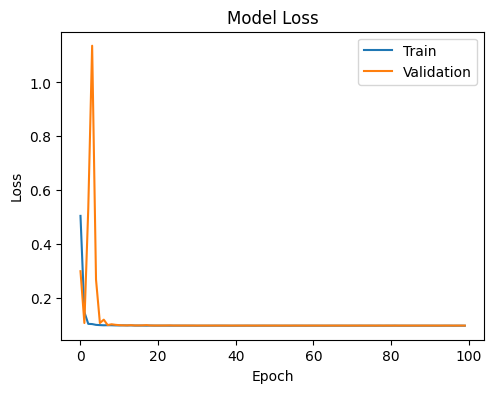

In [39]:
# Visualize the training history
plt.figure(figsize=(12, 4))
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

<h1 style='color:brown' ><font color="blue"  size=+1 face="Comic Sans MS"> Évolution de IOU du modèle pendant l'entraînement </font></h1>

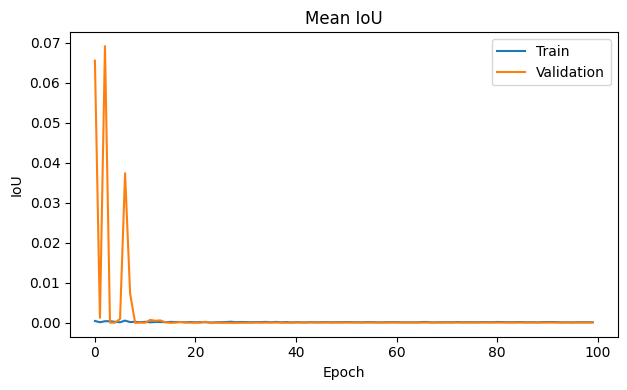

In [75]:
# Plot training & validation IoU values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_iou'])
plt.plot(history.history['val_mean_iou'])
plt.title('Mean IoU')
plt.ylabel('IoU')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

<h1 style='color:brown' ><font color="blue"  size=+1 face="Comic Sans MS"> Évolution de Dice_coefficient du modèle pendant l'entraînement </font></h1>

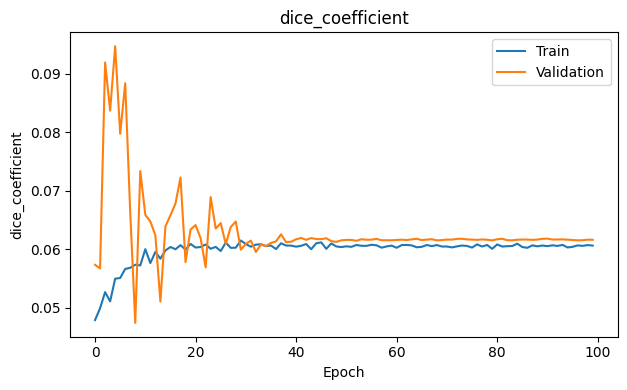

In [45]:
# Plot training & validation IoU values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['dice_coefficient'])
plt.plot(history.history['val_dice_coefficient'])
plt.title('dice_coefficient')
plt.ylabel('dice_coefficient')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

> <h1 style='color:brown' ><font color="green"  size=+2 face="Comic Sans MS"> 7) - Predictions par le modèle SegNet </font></h1>

<h1 style='color:brown' ><font color="blue"  size=+1 face="Comic Sans MS"> La figure présentée offre une visualisation complète du processus. La première colonne expose l'image originale de la feuille affectée par la maladie, offrant un contexte visuel clair. La deuxième colonne présente le masque réel, délimitant les zones touchées par la maladie. La troisième colonne affiche le masque prédit de manière probabiliste par notre modèle SegNet, reflétant la confiance du modèle dans chaque pixel. Enfin, la dernière colonne fusionne ces probabilités pour générer un masque final, où la couleur varie en fonction du niveau de probabilité attribué à chaque région. Cette approche permet une évaluation approfondie de la capacité du modèle à identifier et cartographier les zones touchées par les maladies des feuilles de tomate. </font></h1>

1/1 [==============================] - 0s 18ms/step


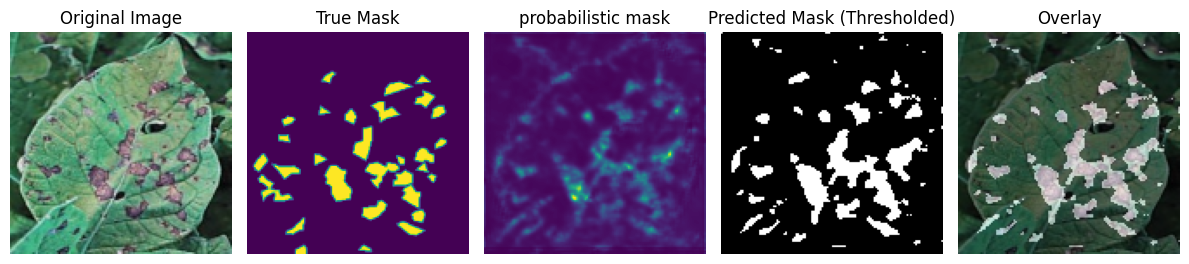

1/1 [==============================] - 0s 18ms/step


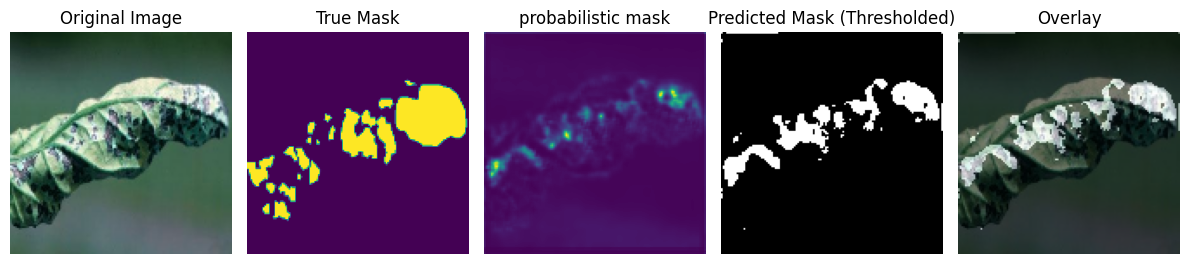

1/1 [==============================] - 0s 19ms/step


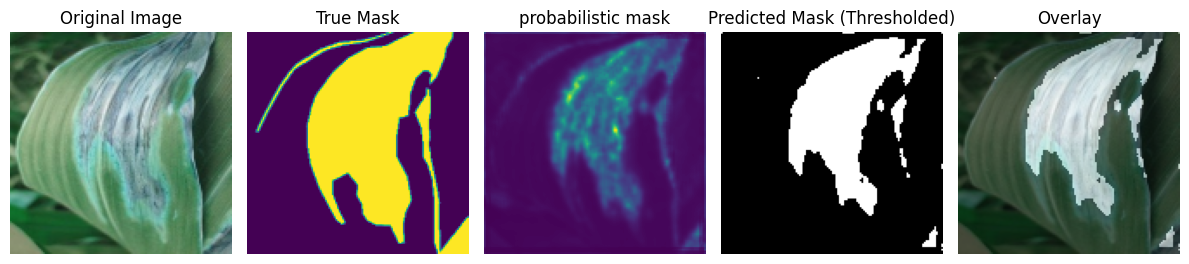

1/1 [==============================] - 0s 18ms/step


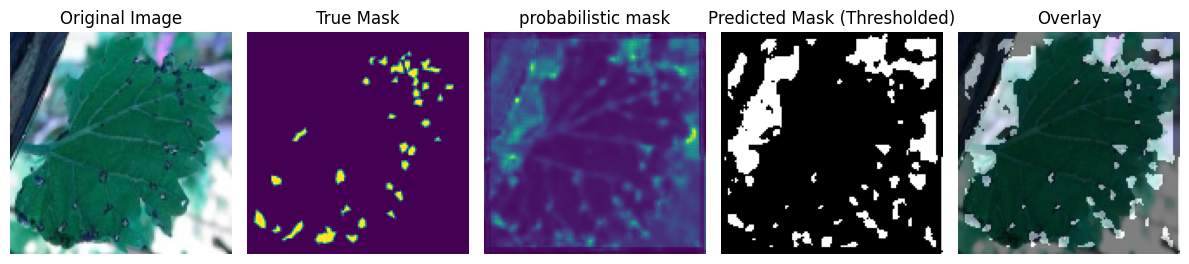

1/1 [==============================] - 0s 20ms/step


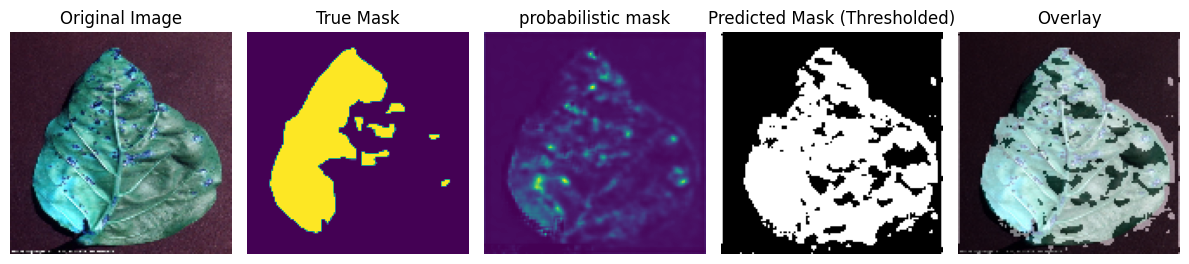

1/1 [==============================] - 0s 19ms/step


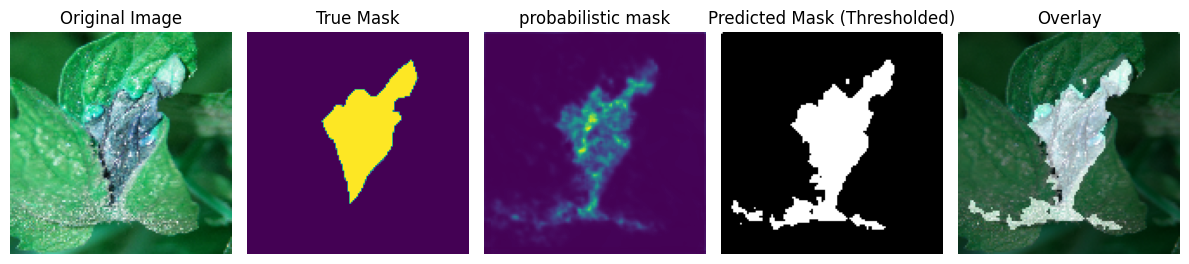

In [130]:
j=21
for i in range(j,j+6):
    # Make predictions on a sample image from the validation set
    sample_image = X_test[i:i+1]
    sample_mask = y_test[i:i+1]
    predictions = model.predict(sample_image)

    # Resize the predicted mask to match the dimensions of the original image
    resized_predictions = cv2.resize(predictions[0], (sample_image.shape[2], sample_image.shape[1]))

    binary_mask = (resized_predictions > 0.02955).astype(int)
    

    # Display the original image, true mask, predicted mask, and the overlay of image and predicted mask
    plt.figure(figsize=(12, 4))

    # Original Image
    plt.subplot(1, 5, 1)
    plt.imshow(sample_image[0])
    plt.title('Original Image')
    plt.axis('off')

    # True Mask
    plt.subplot(1, 5, 2)
    plt.imshow(sample_mask[0, :, :, 0])
    plt.title('True Mask')
    plt.axis('off')
    
    # Predicted Mask
    plt.subplot(1, 5, 3)
    plt.imshow(resized_predictions)
    plt.title('probabilistic mask')
    plt.axis('off')

    # Predicted Mask
    plt.subplot(1, 5, 4)
    plt.imshow(binary_mask, cmap='gray')  # Use a grayscale colormap for binary images
    plt.title('Predicted Mask (Thresholded)')
    plt.axis('off')
    
    
    # Overlay of Image and Predicted Mask
    plt.subplot(1, 5, 5)
    plt.imshow(sample_image[0])
    plt.imshow(binary_mask, cmap='gray', alpha=0.5)  # Overlay predicted mask on the original image
    plt.title('Overlay')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


<h1 style='color:brown' ><font color="blue"  size=+1 face="Comic Sans MS">Dans cette phase, nous quantifions la gravité de la maladie en calculant la surface des zones identifiées par le masque prédit par notre modèle SegNet. En utilisant des méthodes de traitement d'image, nous mesurons la proportion de pixels affectés par la maladie, fournissant ainsi une évaluation précise de l'étendue des dommages sur les feuilles de tomate.</font></h1>

1/1 [==============================] - 0s 19ms/step
the percentage of the affected part of the leaf :  15.228271484375 %


(-0.5, 127.5, 127.5, -0.5)

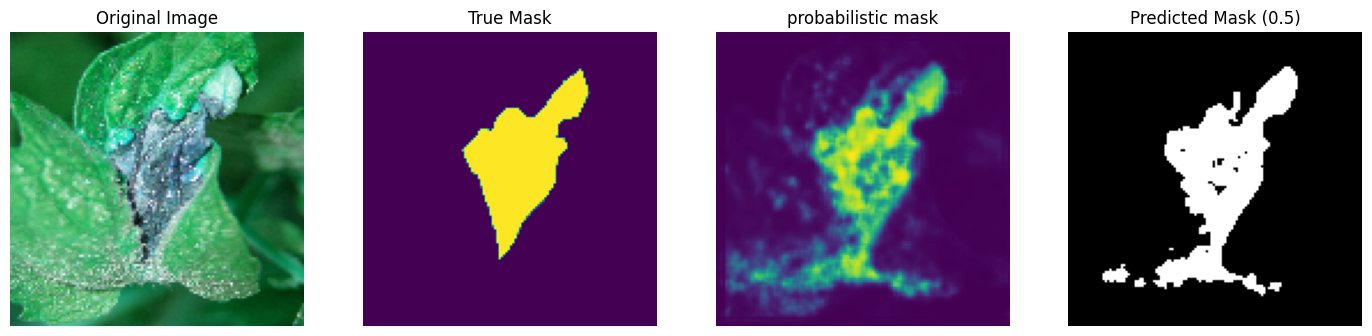

In [69]:
i=26
sample_image = X_val[i:i+1]
sample_mask = y_val[i:i+1]
predictions = best_model.predict(sample_image)

# Resize the predicted mask to match the dimensions of the original image
resized_predictions = cv2.resize(predictions[0], (sample_image.shape[2], sample_image.shape[1]))

binary_mask = (resized_predictions > 0.409955).astype(int)

percentage_affected = (binary_mask.sum() / binary_mask.size) * 100
print('the percentage of the affected part of the leaf : ' , percentage_affected , '%')

# Display the original image, true mask, predicted mask, and the overlay of image and predicted mask
plt.figure(figsize=(22, 17))

# Original Image
plt.subplot(1, 5, 1)
plt.imshow(sample_image[0])
plt.title('Original Image')
plt.axis('off')

# True Mask
plt.subplot(1, 5, 2)
plt.imshow(sample_mask[0, :, :, 0])
plt.title('True Mask')
plt.axis('off')

# Predicted Mask
plt.subplot(1, 5, 3)
plt.imshow(resized_predictions)
plt.title('probabilistic mask')
plt.axis('off')

# Predicted Mask
plt.subplot(1, 5, 4)
plt.imshow(binary_mask, cmap='gray')  # Use a grayscale colormap for binary images
plt.title('Predicted Mask (0.5)')
plt.axis('off')



<h1 style='color:brown' ><font color="red"  size=+3 face="Comic Sans MS"> VII - Segmentation sémantique : Construire le modèle Unet</font></h1>

> <font   size=+2 face="Comic Sans MS"> <h1 style='color:green' >1) - Définir le modèle Unet </h1>


<font color="blue"  size=+2 face="Comic Sans MS"><p ><strong>Structure :</strong> Structuré avec une phase contractante et une phase expansive pour la segmentation d'images.</p>

<h4 style='color:Black' ><font color="blue" align='left' size=+1 face="Arial">Phase contractante :</font></h4>
<ul style='color:Blue'>
  <li>Utilise des convolutions et des max-pooling pour extraire des caractéristiques.</li>
  <li>Couche de dropout pour régulariser le modèle.</li>
</ul>

<h4 style='color:Blue' ><font color="blue" align='left' size=+1 face="Arial">Phase expansive :</font></h4>
<ul style='color:Blue'>
  <li>Utilise des convolutions transposées pour augmenter la résolution.</li>
</ul>

<h4 style='color:black' ><font color="blue" align='left' size=+1 face="Arial">Caractéristiques :</font></h4>
<ul style='color:Blue'>
  <li>Concaténation entre les phases contractante et expansive pour une meilleure localisation des objets.</li>
</ul>

<h4 style='color:Blue' ><font color="blue" align='left' size=+0.7 face="Arial">Couche de sortie sigmoid :</font></h4>
<p style='color:Blue'>Produit des prédictions binaires, adaptées à la tâche de segmentation d'images.</p>
</font></font>

In [106]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout

# Define the U-Net model with dropout
def unet_model(input_shape, dropout_rate=0.5):
    inputs = Input(shape=input_shape)

    # Define the contracting path with dropout
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    drop1 = Dropout(dropout_rate)(pool1)

    # Define the expansive path with dropout
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(drop1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    up1 = UpSampling2D(size=(2, 2))(conv2)
    up1 = concatenate([up1, conv1], axis=-1)
    drop2 = Dropout(dropout_rate)(up1)

    # Add more layers as needed...

    # Output layer
    output = Conv2D(1, 1, activation='sigmoid')(drop2)

    model = Model(inputs=inputs, outputs=output)
    return model

# Set your desired input shape
input_shape = (128, 128, 3)

# Create the U-Net model
model = unet_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou, dice_coefficient])

> <h1 style='color:brown' ><font color="green"  size=+2 face="Comic Sans MS"> 2) -Planification de Taux d'Apprentissage et Points de Contrôle </font></h1>

In [107]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
import numpy as np

num_epochs = 10
batch_size = 32

# Define the checkpoint callback
checkpoint_path = '/kaggle/working/runs/Unet'
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_mean_iou',  # You can choose the metric to monitor
                             save_best_only=True,  # Save only the best model
                             mode='max',  # Depends on the metric, e.g., 'min' for validation loss
                             verbose=1)


def lr_schedule(epoch):
    """
    Learning Rate Schedule

    :param epoch: The current epoch
    """
    initial_lr = 0.001  # Adjust this as needed
    drop = 0.5  # Learning rate will be multiplied by this factor
    epochs_drop = 5  # Drop the learning rate every 'epochs_drop' epochs
    lr = initial_lr * np.power(drop, np.floor((1 + epoch) / epochs_drop))
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule, verbose=1)

> <h1 style='color:brown' ><font color="green"  size=+2 face="Comic Sans MS"> 3) - L'entraînement du modèle Unet</font></h1>

In [108]:
# Train the model
history= model.fit(X_train,  y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint , lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100


2024-01-05 18:28:09.219191: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_7/dropout_36/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


64/65 [============================>.] - ETA: 0s - loss: 6.4009 - mean_iou: 0.0145 - dice_coefficient: 0.0280
Epoch 1: val_mean_iou improved from -inf to 0.00000, saving model to /kaggle/working/runs/Unet
65/65 [==============================] - 8s 102ms/step - loss: 6.3871 - mean_iou: 0.0146 - dice_coefficient: 0.0281 - val_loss: 3.7972 - val_mean_iou: 1.6442e-06 - val_dice_coefficient: 1.9137e-06 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/100
64/65 [============================>.] - ETA: 0s - loss: 4.7359 - mean_iou: 0.0209 - dice_coefficient: 0.0403
Epoch 2: val_mean_iou did not improve from 0.00000
65/65 [==============================] - 4s 68ms/step - loss: 4.7392 - mean_iou: 0.0209 - dice_coefficient: 0.0402 - val_loss: 3.7516 - val_mean_iou: 0.0000e+00 - val_dice_coefficient: 8.0623e-12 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/100
64/65 [============================>.] - ETA: 0s - loss: 3.8875

In [109]:
from tensorflow.keras.models import load_model


# Include custom metrics in custom_objects
custom_objects = {'mean_iou': mean_iou, 'dice_coefficient': dice_coefficient}
# Load the model using custom_objects
best_model = load_model('/kaggle/working/runs/Unet', custom_objects=custom_objects)

> <h1 style='color:brown' ><font color="green"  size=+2 face="Comic Sans MS"> 4) - Évaluation du modèle Unet
    </font></h1>
> <h1 style='color:brown' ><font color="brown"  size=+1 face="Comic Sans MS"> a) - Métriques de performance </font></h1>


<h1 style='color:brown' ><font color="blue"  size=+1 face="Comic Sans MS"> Les résultats obtenus par le modèle U-Net dévoilent une perte de test de 66.6986, suggérant une performance générale. Cependant, l'Indice de Jaccard (IoU) de 0.0528 et le Coefficient Dice de 0.1000 indiquent une amélioration nécessaire dans la capacité du modèle à capturer la superposition des masques prédits avec les masques réels. </font></h1>

In [86]:
# Evaluate on the test set
test_loss, test_iou, test_dice = best_model.evaluate(X_val, y_val)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test IoU: {test_iou:.4f}')
print(f'Test Dice Coefficient: {test_dice:.4f}')

14/14 [==============================] - 0s 18ms/step - loss: 66.6986 - mean_iou: 0.0528 - dice_coefficient: 0.1000
Test Loss: 66.6986
Test IoU: 0.0528
Test Dice Coefficient: 0.1000


In [89]:
df['Unet_model'] = [test_loss, test_iou, test_dice]
df

Unet_model
loss               66.698601
iou                 0.052773
Dice coefficient    0.099984


> <h1 style='color:brown' ><font color="brown"  size=+1 face="Comic Sans MS"> b) -Évolution de la performance du modèle pendant l'entraînement  </font></h1>
<h1 style='color:brown' ><font color="blue"  size=+1 face="Comic Sans MS"> Évolution de Loss du modèle pendant l'entraînement  </font></h1>

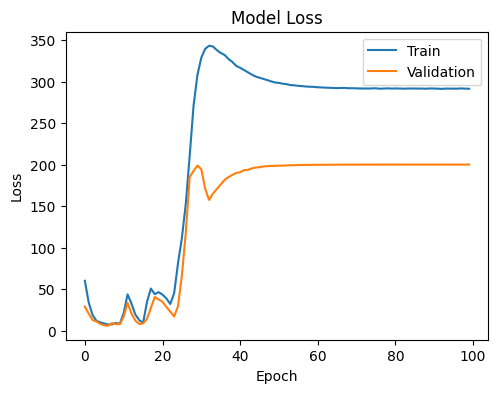

In [76]:
# Visualize the training history
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

<h1 style='color:brown' ><font color="blue"  size=+1 face="Comic Sans MS"> Évolution de IOU du modèle pendant l'entraînement  </font></h1>

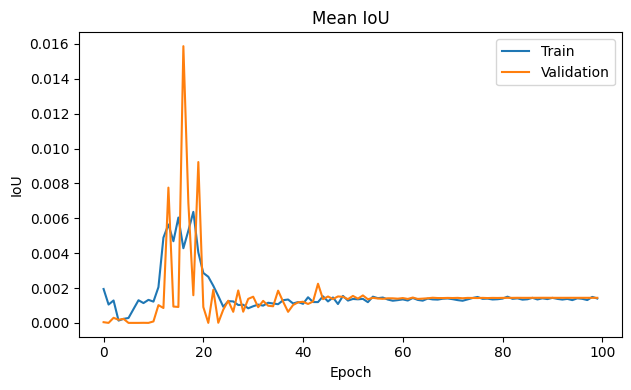

In [67]:
# Plot training & validation IoU values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_iou'])
plt.plot(history.history['val_mean_iou'])
plt.title('Mean IoU')
plt.ylabel('IoU')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

<h1 style='color:brown' ><font color="blue"  size=+1 face="Comic Sans MS"> Évolution de Dice_coefficient du modèle pendant l'entraînement  </font></h1>

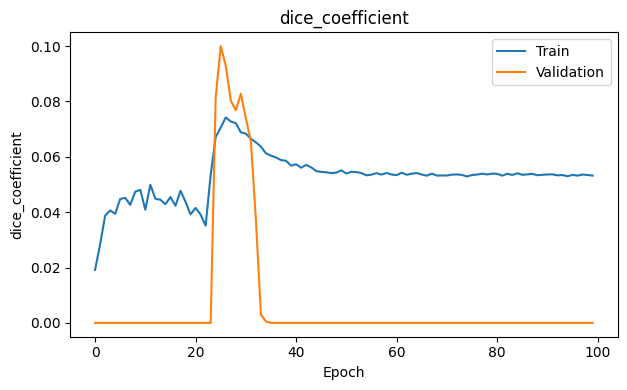

In [70]:
# Plot training & validation IoU values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['dice_coefficient'])
plt.plot(history.history['val_dice_coefficient'])
plt.title('dice_coefficient')
plt.ylabel('dice_coefficient')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

> <h1 style='color:brown' ><font color="green"  size=+2 face="Comic Sans MS"> 7) - Predictions par le modèle Unet </font></h1>
<h1 style='color:brown' ><font color="blue"  size=+1 face="Comic Sans MS"> La figure présentée offre une visualisation complète du processus. La première colonne expose l'image originale de la feuille affectée par la maladie, offrant un contexte visuel clair. La deuxième colonne présente le masque réel, délimitant les zones touchées par la maladie. La troisième colonne affiche le masque prédit de manière probabiliste par notre modèle Unet, reflétant la confiance du modèle dans chaque pixel. Enfin, la dernière colonne fusionne ces probabilités pour générer un masque final, où la couleur varie en fonction du niveau de probabilité attribué à chaque région. Cette approche permet une évaluation approfondie de la capacité du modèle à identifier et cartographier les zones touchées par les maladies des feuilles de tomate. </font></h1>

1/1 [==============================] - 0s 18ms/step


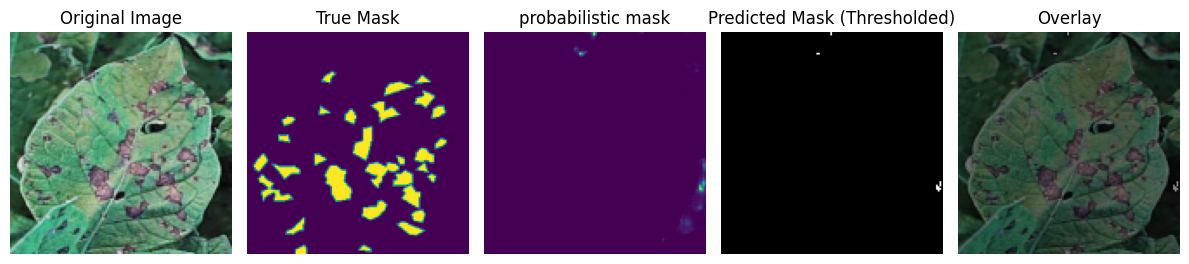

1/1 [==============================] - 0s 18ms/step


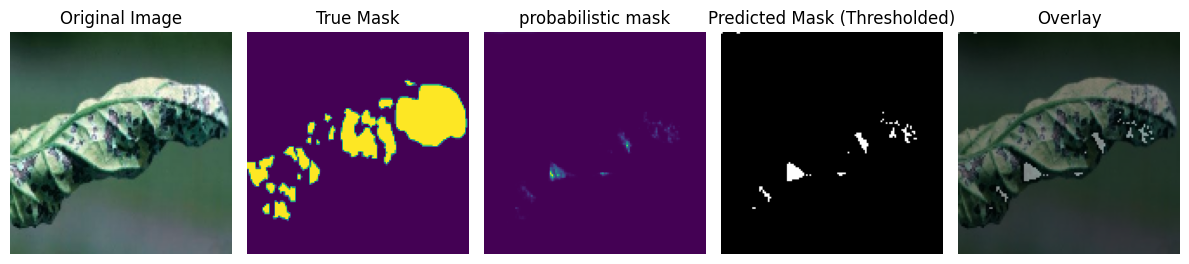

1/1 [==============================] - 0s 18ms/step


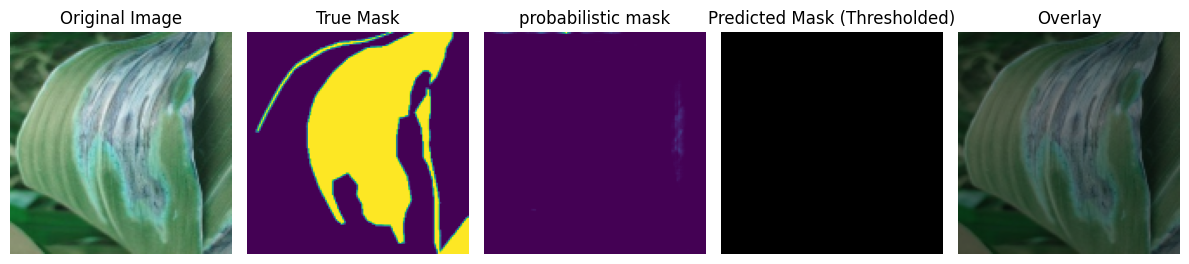

1/1 [==============================] - 0s 17ms/step


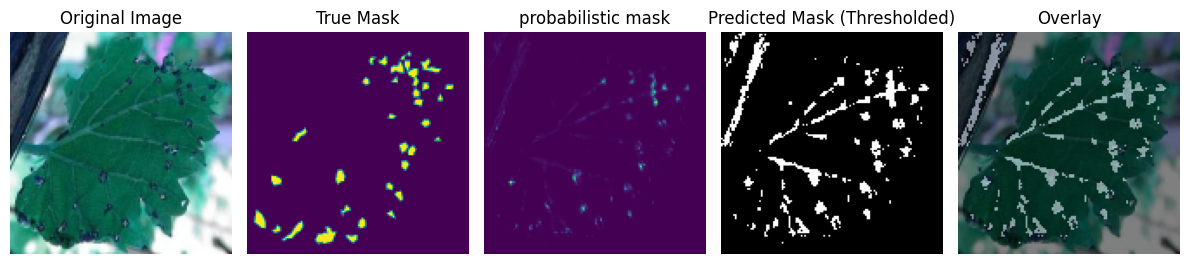

1/1 [==============================] - 0s 18ms/step


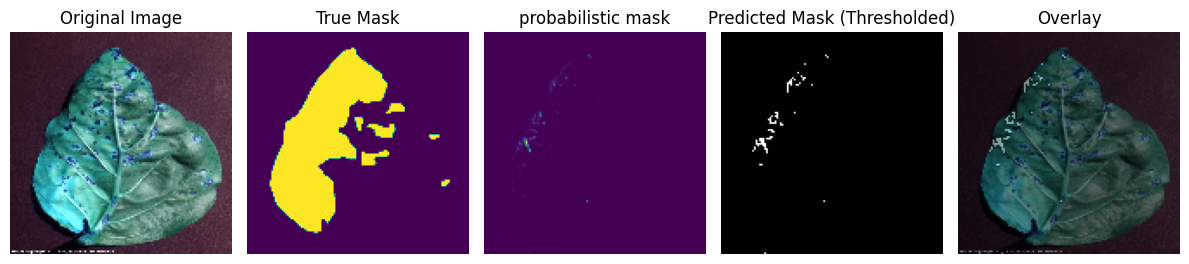

1/1 [==============================] - 0s 18ms/step


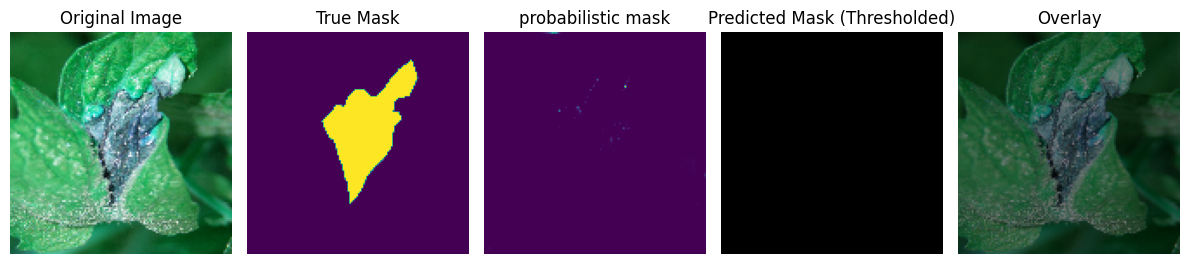

In [112]:
j=21
for i in range(j,j+6):
    # Make predictions on a sample image from the validation set
    sample_image = X_test[i:i+1]
    sample_mask = y_test[i:i+1]
    predictions = best_model.predict(sample_image)

    # Resize the predicted mask to match the dimensions of the original image
    resized_predictions = cv2.resize(predictions[0], (sample_image.shape[2], sample_image.shape[1]))

    binary_mask = (resized_predictions > 0.010006955).astype(int)
    

    # Display the original image, true mask, predicted mask, and the overlay of image and predicted mask
    plt.figure(figsize=(12, 4))

    # Original Image
    plt.subplot(1, 5, 1)
    plt.imshow(sample_image[0])
    plt.title('Original Image')
    plt.axis('off')

    # True Mask
    plt.subplot(1, 5, 2)
    plt.imshow(sample_mask[0, :, :, 0])
    plt.title('True Mask')
    plt.axis('off')
    
    # Predicted Mask
    plt.subplot(1, 5, 3)
    plt.imshow(resized_predictions)
    plt.title('probabilistic mask')
    plt.axis('off')

    # Predicted Mask
    plt.subplot(1, 5, 4)
    plt.imshow(binary_mask, cmap='gray')  # Use a grayscale colormap for binary images
    plt.title('Predicted Mask (Thresholded)')
    plt.axis('off')
    
    
    # Overlay of Image and Predicted Mask
    plt.subplot(1, 5, 5)
    plt.imshow(sample_image[0])
    plt.imshow(binary_mask, cmap='gray', alpha=0.5)  # Overlay predicted mask on the original image
    plt.title('Overlay')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [120]:
df

Segnet_model  Unet_model
loss                  0.268318   66.698601
iou                   0.062426    0.052773
Dice coefficient      0.094692    0.099984

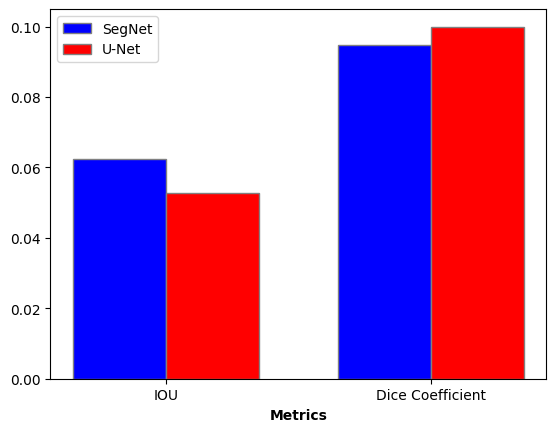

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = [ 'IOU', 'Dice Coefficient']
segnet_values = [ 0.062426, 0.094692]
unet_values = [0.052773, 0.099984]

# Set up the figure and axis
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Set the bar positions
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]

# Plot the bars
plt.bar(r1, segnet_values, color='b', width=bar_width, edgecolor='grey', label='SegNet')
plt.bar(r2, unet_values, color='r', width=bar_width, edgecolor='grey', label='U-Net')

# Add labels
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(metrics))], metrics)

# Add legend
plt.legend()

# Show the plot
plt.show()
